# Confidence

We want to know if changing the confidence that BISICLES has in the velocity observations has a significant effect on the resulting fields for C and muCoef. So here we solve the inverse problem with the same inputs but with different spatial fields of the confidence parameter:


$$ \text{conf} = \exp \left( {-\alpha \frac{\sqrt{\sigma^2 + \epsilon^2}}{|v|}} \right) $$

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obs = xr.open_dataset("/Users/jonniebarnsley/data/MEaSUREs/MEaSUREs_antarctica_v2_bisicles_1km.nc")

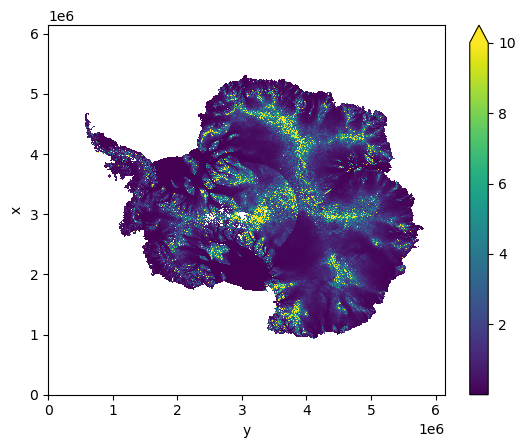

In [3]:
noise_to_signal = np.hypot(obs['std'], obs['err']) / abs(obs['speed'])
noise_to_signal.plot(vmax=10)

In [42]:
conf = {}
for a in np.linspace(1, 5, 9):
    print(a, 0.5**a)
    conf[f'conf_{int(2*a - 1)}'] = np.exp(-(0.5**a)*noise_to_signal).fillna(0)

1.0 0.5
1.5 0.3535533905932738
2.0 0.25
2.5 0.1767766952966369
3.0 0.125
3.5 0.08838834764831845
4.0 0.0625
4.5 0.04419417382415922
5.0 0.03125


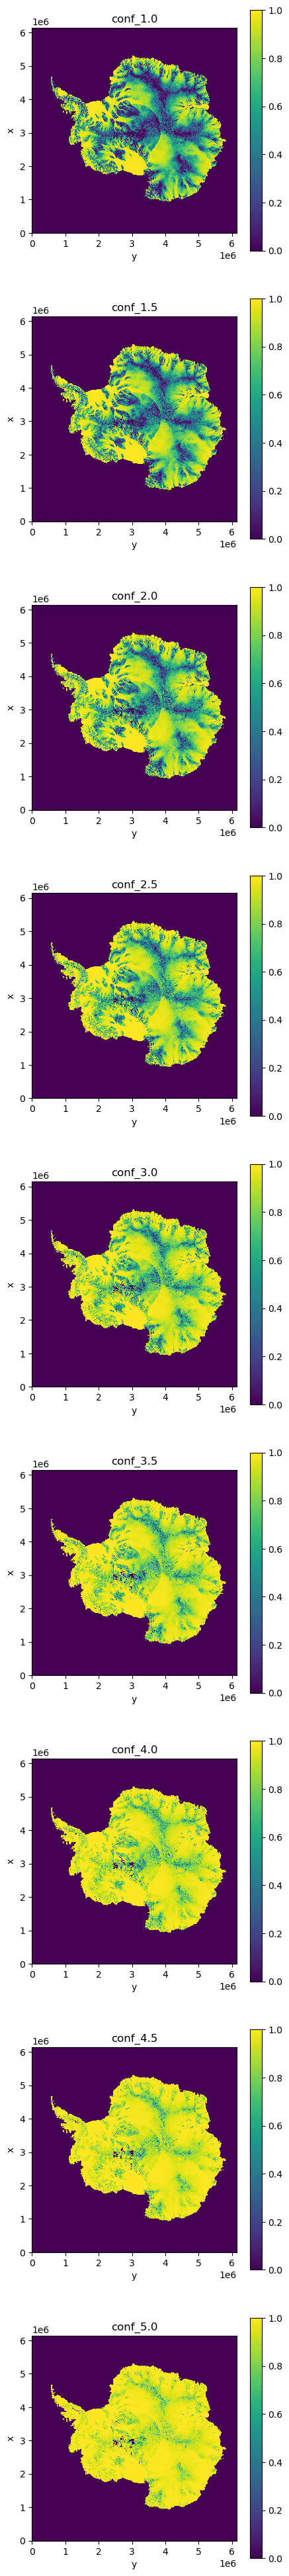

In [25]:
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(5, 50))

for ax, a in zip(axes, conf.keys()):
    conf[a].plot(ax=ax, vmin=0, vmax=1)
    ax.set_title(a)
    ax.set_aspect('equal')

In [43]:
ds = xr.Dataset(conf)
ds

<xarray.Dataset>
Dimensions:  (x: 6144, y: 6144)
Coordinates:
  * x        (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
  * y        (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
Data variables:
    conf_1   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_2   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_3   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_4   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_5   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_6   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_7   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_8   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    conf_9   (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [46]:
encoding = {
    var: {'zlib': True, 'complevel': 5} for var in ds.data_vars
}
ds.to_netcdf("/Users/jonniebarnsley/data/inversions/confidence.nc", encoding=encoding)

## Results

In [3]:
path = '/Users/jonniebarnsley/Downloads/confidence/nc'

In [4]:
def get_misfit(conf, obs):
    speed = np.hypot(conf.xVelb, conf.yVelb)
    misfit = speed - obs
    return np.linalg.norm(misfit)

In [5]:
misfits = []
for i in range(1, 9):
    confi = xr.open_dataset(f'{path}/ctrl.conf_{i}.300.nc')
    misfit_norm = get_misfit(confi, obs.speed)
    misfits.append(misfit_norm)

In [6]:
misfits

[1043879.8617616632,
 1038756.9127116076,
 1033879.1947897605,
 1031373.1895990889,
 1029045.2585878993,
 1027129.745520271,
 1025499.8146768195,
 1024846.3053710074]

In [7]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/confidence/nc/ctrl.conf_1.300.nc')
file

<xarray.Dataset>
Dimensions:    (y: 6144, x: 6144)
Coordinates:
  * x          (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.144e+06
  * y          (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.144e+06
Data variables:
    thickness  (y, x) float32 ...
    Z_base     (y, x) float32 ...
    Cwshelf    (y, x) float32 ...
    muCoef     (y, x) float32 ...
    xVelb      (y, x) float32 ...
    yVelb      (y, x) float32 ...
    C_m        (y, x) float32 ...

In [8]:
file2 = xr.open_dataset('/Users/jonniebarnsley/Downloads/confidence/nc/ctrl.conf_9.300.nc')
file2

<xarray.Dataset>
Dimensions:    (y: 6144, x: 6144)
Coordinates:
  * x          (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.144e+06
  * y          (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.144e+06
Data variables:
    thickness  (y, x) float32 ...
    Z_base     (y, x) float32 ...
    Cwshelf    (y, x) float32 ...
    muCoef     (y, x) float32 ...
    xVelb      (y, x) float32 ...
    yVelb      (y, x) float32 ...
    C_m        (y, x) float32 ...

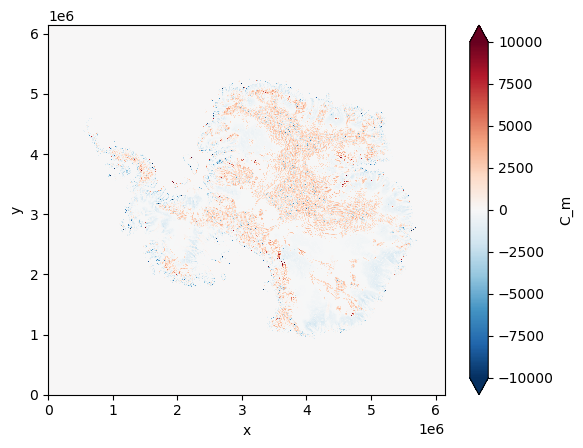

In [7]:
(file.C_m - file2.C_m).plot(vmax=1e4, vmin=-1e4, cmap='RdBu_r')

In [9]:
speed1 = np.hypot(file.xVelb, file.yVelb)
speed2 = np.hypot(file2.xVelb, file2.yVelb)

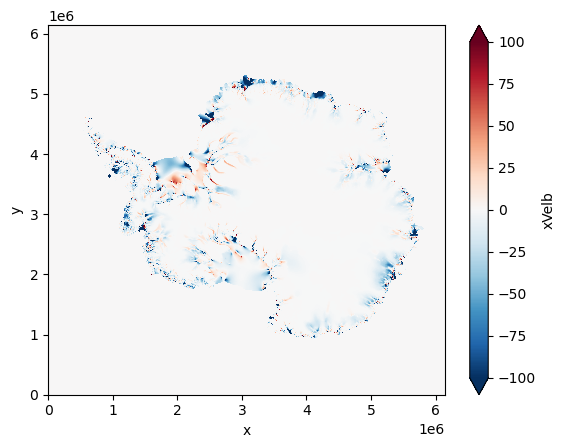

In [14]:
diff = speed2 - speed1
diff.plot(vmax=1e2, vmin=-1e2, cmap='RdBu_r')

In [10]:
obs = obs.rename({'x': 'y', 'y': 'x'})

In [11]:
diff1 = speed1 - obs.speed
diff2 = speed2 - obs.speed

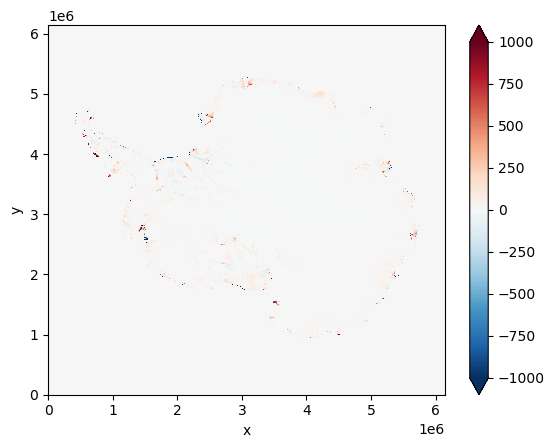

In [12]:
diff1.plot(vmax=1e3, vmin=-1e3, cmap='RdBu_r')

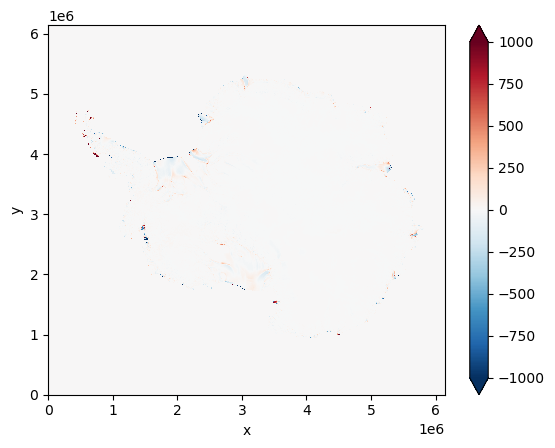

In [27]:
diff2.plot(vmax=1e3, vmin=-1e3, cmap='RdBu_r')

In [28]:
abs(diff1).sum()

<xarray.DataArray ()>
array(1.83205695e+08)

In [29]:
abs(diff2).sum()

<xarray.DataArray ()>
array(1.33278053e+08)

In [33]:
misfits = []
for i in range(1, 9):
    confi = xr.open_dataset(f'{path}/ctrl.conf_{i}.300.nc')
    misfit_norm = get_misfit(confi, obs.speed)
    misfits.append(misfit_norm)

In [34]:
misfits

[254730.9145701546,
 247487.57943102732,
 239059.0570225276,
 234840.33886084403,
 232416.79148765755,
 229719.57994180368,
 228798.16686988657,
 227901.62154551523]

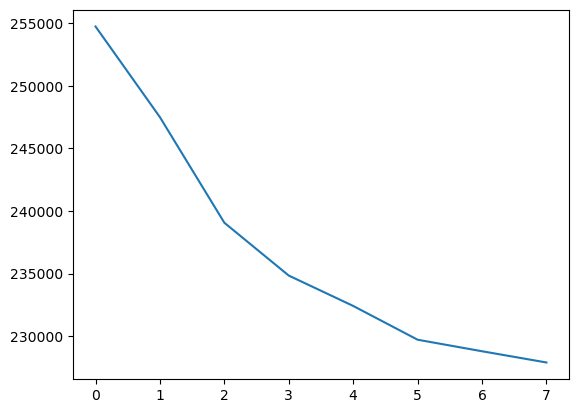

In [36]:
plt.plot(misfits)

In [37]:
C = file.Cwshelf

In [38]:
xgrad, ygrad = np.gradient(C)

In [39]:
gradC = np.hypot(xgrad, ygrad)
solution_norm = np.linalg.norm(gradC)
solution_norm

8857855.0

In [17]:
def get_norms(conf, obs):
    speed = np.hypot(conf.xVelb, conf.yVelb)
    misfit = speed - obs
    misfit_norm = np.linalg.norm(misfit)

    C = conf.Cwshelf
    muCoef = conf.muCoef

    xgradC, ygradC = np.gradient(C, 1000, 1000)
    solution_norm = np.sqrt(np.sum(xgradC**2 + ygradC**2))

    # gradC = np.hypot(xgradC, ygradC)
    # gradC_norm = np.linalg.norm(gradC)

    # xgradmuCoef, ygradmuCoef = np.gradient(muCoef)
    # gradmuCoef = np.hypot(xgradmuCoef, ygradmuCoef)
    # gradmuCoef_norm = np.linalg.norm(gradmuCoef)

    return misfit_norm, solution_norm#, gradmuCoef_norm



In [18]:
norms = []
for i in range(1, 9):
    conf_i = xr.open_dataset(f'{path}/ctrl.conf_{i}.300.nc')
    norms_i = get_norms(conf_i, obs.speed)
    norms.append(norms_i)

In [19]:
norms

[(254730.9145701546, 8860.868),
 (247487.57943102732, 7345.9067),
 (239059.0570225276, 8882.229),
 (234840.33886084403, 9263.748),
 (232416.79148765755, 8673.131),
 (229719.57994180368, 8524.626),
 (228798.16686988657, 8294.739),
 (227901.62154551523, 7540.6787)]

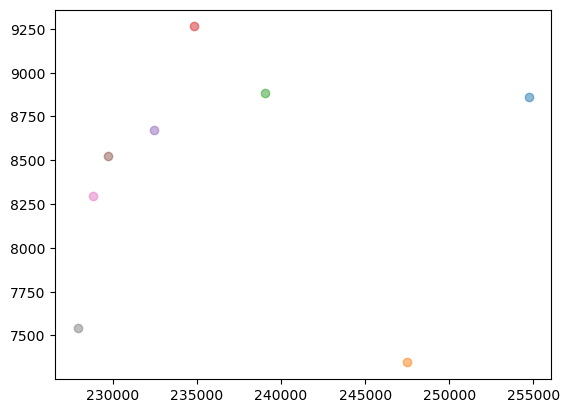

: 

In [ ]:
for norms_i in norms:
    plt.scatter(norms_i[0], norms_i[1], alpha=0.5)